In [11]:
pip install qiskit numpy pylatexenc

  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=aa9ef46311feaa8d3cbe4f0ab427a6b1712ce8302b88d455f18532be639817ce
  Stored in directory: /Users/oneman/Library/Caches/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
Note: you may need to restart the kernel to use updated packages.


In [1]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, AncillaRegister, Parameter
from qiskit.quantum_info import Statevector, Operator

import numpy as np
import SudoquCircuitBuilder as sudoqu
import PuzzleConfigurations as pc

# Summary of the algorithm:

Step 1: input a $2^2\times 2^2$ Sudoku board

Step 2: prepare input for quantum circuit initialization:
    - Find all possible configurations for each row, each column, and each $2\times 2$-quadrant of the given board. If a row/column/quadrant trivially only has one possible configuration, we immediately fill the unknows with that configuration. 
    - The number of rows + columns + quadrants is $4+4+4=12$. This is the number of constraints we will have. Each row/column/quadrant has to take on one of the possible configurations we have found in the previous step. 

Steo 3: Initialize qubits:
    - If $n$ is the number of unknowns left, then we need $n\times 2$ qubits to represent the unkowns. We initialize them as $H\ket{00}$.
    - For each constraint, we will need one ancillar qubit, which tells us if that constraint is satisfied or not.

Step 4: #todo




We begin by inputting the entries of a $2^2\times 2^2$ Sudoku game. Our convention will be to indicate unknown values by $0.$ All other values must be 1, 2, 3, 4.

In [ ]:
#todo: code that reads in a sudoky board

Now we will find all configurations for rows/columns/quadrants and complete the values which can be trivially filled.

In [2]:
puzzle = [
        [3, 1, 4, 2],
        [2, 0, 0, 1],
        [1, 0, 0, 0],
        [4, 0, 0, 3]
    ] #todo: this runs a predefined sudoku. Need to change that to plugging in the one read in above

print("Started with the following puzzle:")
for row in puzzle:
    print(row)
print()

pc.complete_all_trivial_missing_values(puzzle)

print("Completed trivial missing values. Current puzzle:")
for row in puzzle:
    print(row)
print()

# count remaining unknowns
number_of_unknowns = 0
for row in puzzle:
    number_of_unknowns += row.count(0)

print("Number of remaining unknowns:", number_of_unknowns)

Started with the following puzzle:
[3, 1, 4, 2]
[2, 0, 0, 1]
[1, 0, 0, 0]
[4, 0, 0, 3]

Completed trivial missing values. Current puzzle:
[3, 1, 4, 2]
[2, 4, 3, 1]
[1, 0, 0, 4]
[4, 0, 0, 3]

Number of remaining unknowns: 4


Our next step is to initiate our qubits and a circuit. Let $n$ be the number of unknowns on the board after completing obvous unknowns. To represent the four numbers 1, 2, 3, 4 we will need 2 bits. Each bit we can then represent via a quibit in the obvious way: $0\mapsto \ket{0}$ and $1\mapsto \ket{1}$. Thus we need two qubits to represent the four numbers 1, 2, 3, 4 via qubits. Hence, we initiate $n\times 2$ qubits for the unknowns. 

Notation: We will use the number $0$ to represent an unknown on the board. To save space, we will then represent the numbers 1, 2, 3, 4 as follows via bits: $$1\mapsto 00,$$
$$2\mapsto 01,$$
$$3\mapsto 10,$$ 
$$4\mapsto 11.$$

Notation: Let $i$ be an integer from $0$ to $n-1$. We denote by u_i the qubit corresponding to the zeroth bit of the $i$-th unknown and by t_i the first bit of the $i$-th unknown. For example, if the $7$-th unknown ends up being 3, we represent it with the bits $10$ and thus u_7=0 and t_7=1.

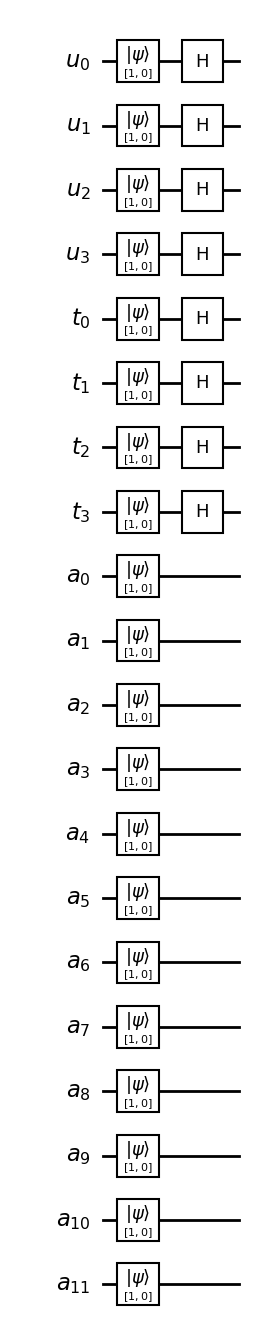

In [5]:
quantum_register_u = QuantumRegister(size=number_of_unknowns, name="u") #first bit of each unknown
quantum_register_t = QuantumRegister(size=number_of_unknowns, name="t") #second bit of each unknown
ancilla_register = AncillaRegister(size=12, name="a") #ancilla bits for the sudoku constraints

quantum_circuit = QuantumCircuit(quantum_register_u, quantum_register_t, ancilla_register, name="sudoqu") 

#initialize the unknowns as H|0>
for i in range(number_of_unknowns):
    quantum_circuit.initialize([1, 0], quantum_register_u[i])
    quantum_circuit.initialize([1, 0], quantum_register_t[i])
for i in range(number_of_unknowns):
    quantum_circuit.h(quantum_register_u[i])
    quantum_circuit.h(quantum_register_t[i])
#initialize the ancilla bits to |0>
for i in range(12):
    quantum_circuit.initialize([1, 0], ancilla_register[i])

# draw the empty circuit
quantum_circuit.draw(output="mpl", style="bw")
